#Run first time only

In [18]:
#Install the PyDrive wrapper & import libraries.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1wWWsPgyI2I8X3x6FQSj8xRn1ksrsRw46'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

In [19]:
!unzip /content/noise-reducer-ml.zip
!rm /content/noise-reducer-ml.zip

Archive:  /content/noise-reducer-ml.zip
   creating: noise-reducer-ml/
   creating: noise-reducer-ml/.git/
   creating: noise-reducer-ml/.git/branches/
   creating: noise-reducer-ml/.git/hooks/
  inflating: noise-reducer-ml/.git/hooks/pre-push.sample  
  inflating: noise-reducer-ml/.git/hooks/pre-receive.sample  
  inflating: noise-reducer-ml/.git/hooks/prepare-commit-msg.sample  
  inflating: noise-reducer-ml/.git/hooks/post-update.sample  
  inflating: noise-reducer-ml/.git/hooks/pre-applypatch.sample  
  inflating: noise-reducer-ml/.git/hooks/commit-msg.sample  
  inflating: noise-reducer-ml/.git/hooks/pre-rebase.sample  
  inflating: noise-reducer-ml/.git/hooks/update.sample  
  inflating: noise-reducer-ml/.git/hooks/pre-commit.sample  
  inflating: noise-reducer-ml/.git/hooks/applypatch-msg.sample  
  inflating: noise-reducer-ml/.git/hooks/fsmonitor-watchman.sample  
  inflating: noise-reducer-ml/.git/description  
   creating: noise-reducer-ml/.git/info/
  inflating: noise-reduce

#Run for each audio

##Upload audio here

In [29]:
from google.colab import files
%cd /content
uploaded = files.upload()

/content


Saving noisy_fileid_344.wav to noisy_fileid_344.wav


##Just run

In [30]:
%cd '/content/noise-reducer-ml/denoiser-inverse/denoiser'
import sys
import os

py_file_location = "./denoiser"
sys.path.append(os.path.abspath(py_file_location))
import demucs
from enhance import pred
from stft_loss import loss_func

/content/noise-reducer-ml/denoiser-inverse/denoiser


In [31]:
import glob

files = []
for file in glob.glob("/content/*.wav"):
    files.append(file)

In [32]:
noisy, estimated = pred(model_path='/content/noise-reducer-ml/Copy of checkpoint_epoch-155_loss-0.002624.h5',noisy_file_path=files[0])

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import librosa
import IPython.display as ipd
from IPython.display import Audio

In [34]:
!cd /content/
!rm /content/*.wav

##Outputs

In [35]:
x = noisy
y = estimated
#print(type(clean))
#print(noisy)
#print(clean)
print("This is the noisy audio")
Audio(x.numpy(), rate=48000) 

This is the noisy audio


In [36]:
print("This is the enhanced audio")
Audio(y.numpy(), rate=48000)

This is the enhanced audio


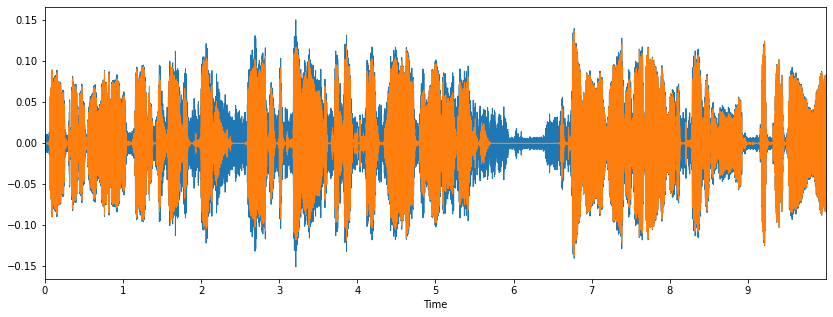

In [37]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(noisy.numpy(), sr=48000)
librosa.display.waveplot(estimated.numpy(), sr=48000)
import scipy.io.wavfile as wavfile